##HHS Insurance Marketplace EDA
Author: Mehdi

###About this notebook
In this notebook, I am going to prepare a summary of [Health Insurance Marketplace Public Use Files (Marketplace PUF)](https://www.cms.gov/CCIIO/Resources/Data-Resources/marketplace-puf.html) from CMS. For simplicity, I will only summarize the 2016 data here. If you have any questions regarding this notebook, please contact me at [mehdi@bayesimpact.org](mailto:mehdi@bayesimpact.org).

This image is helpful to understand the connection between different datasets:
![data model](https://docs.google.com/drawings/d/1paF5aJ17qBBlK6egdRbz__C1N_qdtnuU6CTRqDddpjE/pub?w=600)

###More EDAs on this dataset
* data clean-up and sample analysis [here](https://github.com/steevelaquitaine/bayeshack2016-prep-HHS).
* scripts for cleaning and formatting the crosswalk files [here](https://github.com/stamang/marketplace).

###Abbreviations
* ACA: Affordable Care Act
* QHP: Qualified Health Plan
* SADP: Stand-alone Dental Plan

###if you want to reproduce this notebook
1. clone the repo `git clone https://github.com/bayesimpact/bayeshack-hhs-marketplace.git`
2. run `source data/download.sh 2016` from the main directory to download 2016 data.

In [103]:
#Imports and libraries here
%pylab inline

import os
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
#All our datasets live in /data directory.
data_path = "../data/2016"

First, I want to list all the datasets that I have:

In [3]:
files_in_dir = os.listdir(data_path)
for filename in files_in_dir:
    print filename

benefits-and-cost-sharing-puf.csv
business-rules-puf.csv
Machine Readable PUF 03-27-2016.xlsx
network-puf.csv
plan-attributes-puf.csv
plan-id-crosswalk-puf.CSV
rate-puf.csv
service-area-puf.csv


##Plan Attributes
Let's start by this file. This dataset has all the plans offered under ACA, and their attributes. You can find the data dictionary [here](https://www.cms.gov/CCIIO/Resources/Data-Resources/Downloads/PlansAttributes_DataDictionary_2016.pdf).

In [4]:
plan_attr_df = pd.read_csv(os.path.join(data_path, 'plan-attributes-puf.csv'), low_memory=False)
print("It reads %d rows and %d columns." % (plan_attr_df.shape[0], plan_attr_df.shape[1]))
plan_attr_df.head(2)

It reads 27154 rows and 151 columns.


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,BenefitPackageId,IssuerId2,StateCode2,MarketCoverage,DentalOnlyPlan,TIN,StandardComponentId,PlanMarketingName,HIOSProductId,HPID,NetworkId,ServiceAreaId,FormularyId,IsNewPlan,PlanType,MetalLevel,UniquePlanDesign,QHPNonQHPTypeId,IsNoticeRequiredForPregnancy,IsReferralRequiredForSpecialist,SpecialistRequiringReferral,PlanLevelExclusions,IndianPlanVariationEstimatedAdvancedPaymentAmountPerEnrollee,CompositeRatingOffered,ChildOnlyOffering,ChildOnlyPlanId,WellnessProgramOffered,DiseaseManagementProgramsOffered,EHBPercentTotalPremium,EHBPediatricDentalApportionmentQuantity,IsGuaranteedRate,SpecialtyDrugMaximumCoinsurance,InpatientCopaymentMaximumDays,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,PlanEffictiveDate,PlanExpirationDate,OutOfCountryCoverage,OutOfCountryCoverageDescription,OutOfServiceAreaCoverage,OutOfServiceAreaCoverageDescription,NationalNetwork,URLForEnrollmentPayment,FormularyURL,PlanId,CSRVariationType,IssuerActuarialValue,AVCalculatorOutputNumber,MedicalDrugDeductiblesIntegrated,MedicalDrugMaximumOutofPocketIntegrated,MultipleInNetworkTiers,FirstTierUtilization,SecondTierUtilization,SBCHavingaBabyDeductible,SBCHavingaBabyCopayment,SBCHavingaBabyCoinsurance,SBCHavingaBabyLimit,SBCHavingDiabetesDeductible,SBCHavingDiabetesCopayment,SBCHavingDiabetesCoinsurance,SBCHavingDiabetesLimit,MEHBInnTier1IndividualMOOP,MEHBInnTier1FamilyPerPersonMOOP,MEHBInnTier1FamilyPerGroupMOOP,MEHBInnTier2IndividualMOOP,MEHBInnTier2FamilyPerPersonMOOP,MEHBInnTier2FamilyPerGroupMOOP,MEHBOutOfNetIndividualMOOP,MEHBOutOfNetFamilyPerPersonMOOP,MEHBOutOfNetFamilyPerGroupMOOP,MEHBCombInnOonIndividualMOOP,MEHBCombInnOonFamilyPerPersonMOOP,MEHBCombInnOonFamilyPerGroupMOOP,DEHBInnTier1IndividualMOOP,DEHBInnTier1FamilyPerPersonMOOP,DEHBInnTier1FamilyPerGroupMOOP,DEHBInnTier2IndividualMOOP,DEHBInnTier2FamilyPerPersonMOOP,DEHBInnTier2FamilyPerGroupMOOP,DEHBOutOfNetIndividualMOOP,DEHBOutOfNetFamilyPerPersonMOOP,DEHBOutOfNetFamilyPerGroupMOOP,DEHBCombInnOonIndividualMOOP,DEHBCombInnOonFamilyPerPersonMOOP,DEHBCombInnOonFamilyPerGroupMOOP,TEHBInnTier1IndividualMOOP,TEHBInnTier1FamilyPerPersonMOOP,TEHBInnTier1FamilyPerGroupMOOP,TEHBInnTier2IndividualMOOP,TEHBInnTier2FamilyPerPersonMOOP,TEHBInnTier2FamilyPerGroupMOOP,TEHBOutOfNetIndividualMOOP,TEHBOutOfNetFamilyPerPersonMOOP,TEHBOutOfNetFamilyPerGroupMOOP,TEHBCombInnOonIndividualMOOP,TEHBCombInnOonFamilyPerPersonMOOP,TEHBCombInnOonFamilyPerGroupMOOP,MEHBDedInnTier1Individual,MEHBDedInnTier1FamilyPerPerson,MEHBDedInnTier1FamilyPerGroup,MEHBDedInnTier1Coinsurance,MEHBDedInnTier2Individual,MEHBDedInnTier2FamilyPerPerson,MEHBDedInnTier2FamilyPerGroup,MEHBDedInnTier2Coinsurance,MEHBDedOutOfNetIndividual,MEHBDedOutOfNetFamilyPerPerson,MEHBDedOutOfNetFamilyPerGroup,MEHBDedCombInnOonIndividual,MEHBDedCombInnOonFamilyPerPerson,MEHBDedCombInnOonFamilyPerGroup,DEHBDedInnTier1Individual,DEHBDedInnTier1FamilyPerPerson,DEHBDedInnTier1FamilyPerGroup,DEHBDedInnTier1Coinsurance,DEHBDedInnTier2Individual,DEHBDedInnTier2FamilyPerPerson,DEHBDedInnTier2FamilyPerGroup,DEHBDedInnTier2Coinsurance,DEHBDedOutOfNetIndividual,DEHBDedOutOfNetFamilyPerPerson,DEHBDedOutOfNetFamilyPerGroup,DEHBDedCombInnOonIndividual,DEHBDedCombInnOonFamilyPerPerson,DEHBDedCombInnOonFamilyPerGroup,TEHBDedInnTier1Individual,TEHBDedInnTier1FamilyPerPerson,TEHBDedInnTier1FamilyPerGroup,TEHBDedInnTier1Coinsurance,TEHBDedInnTier2Individual,TEHBDedInnTier2FamilyPerPerson,TEHBDedInnTier2FamilyPerGroup,TEHBDedInnTier2Coinsurance,TEHBDedOutOfNetIndividual,TEHBDedOutOfNetFamilyPerPerson,TEHBDedOutOfNetFamilyPerGroup,TEHBDedCombInnOonIndividual,TEHBDedCombInnOonFamilyPerPerson,TEHBDedCombInnOonFamilyPerGroup,IsHSAEligible,HSAOrHRAEmployerContribution,HSAOrHRAEmployerContributionAmount,URLForSummaryofBenefitsCoverage,PlanBrochure,RowNumber
0,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,1,21989,AK,Individual,Yes,93-0438772,21989AK0030001,Delta Dental

There are 27154 plans offered under ACA in 2016.
There are data from 38 out of 50 states. These are the ones with no state-run marketplace.


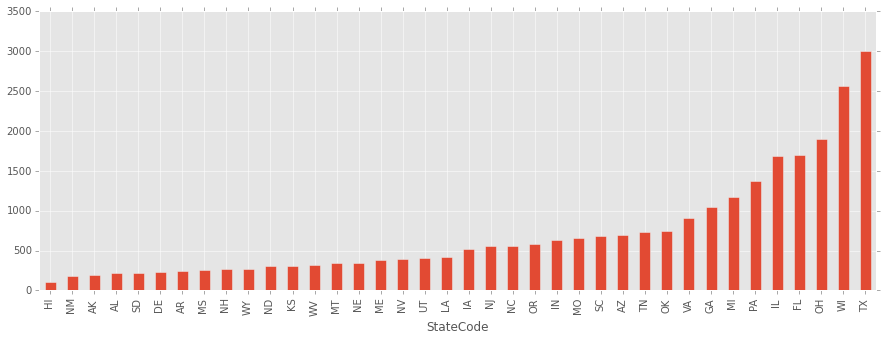

In [24]:
print("There are %d plans offered under ACA in 2016." % plan_attr_df.PlanId.nunique())
print("There are data from %d out of 50 states. These are the ones with no state-run marketplace." % plan_attr_df.StateCode.nunique())
plt.subplots(figsize=(15, 5))
plan_attr_df.groupby('StateCode').PlanId.nunique().order().plot(kind='bar');

##Plan Rate
This dataset contains plan-level data on individual rates based on an eligible subscriber’s age, tobacco use, and
geographic location. Data dictionary [here](https://www.cms.gov/CCIIO/Resources/Data-Resources/Downloads/Rate_DataDictionary_2016.pdf).

In [46]:
plan_rate_df = pd.read_csv(os.path.join(data_path, 'rate-puf.csv'), low_memory=False)
print("It reads %d rows and %d columns." % (plan_rate_df.shape[0], plan_rate_df.shape[1]))
plan_rate_df.head(2)

It reads 3111526 rows and 24 columns.


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,93-0438772,2016-01-01,2016-12-31,21989AK0030001,Rating Area 1,No Preference,0-20,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,93-0438772,2016-01-01,2016-03-31,21989AK0090001,Rating Area 1,No Preference,0-20,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14


Let's look at the average individual rate for in different age groups:

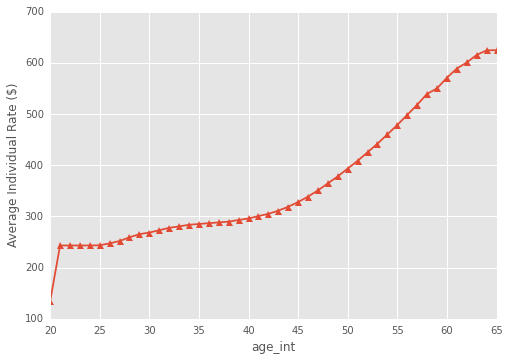

In [96]:
plan_rate_df['age_int'] = plan_rate_df.Age.replace({'0-20': '20', '65 and over': '65', 'Family Option': NaN}).astype('float')
ax = plan_rate_df.groupby('age_int').IndividualRate.mean().plot(marker='^')
ax.set_ylabel('Average Individual Rate ($)');

As expected, it goes up with age.

##Benefits and Cost Sharing
This dataset contains plan-level data on essential health benefits, coverage limits, and cost sharing for each QHP and SADP. Data dictionary [here](https://www.cms.gov/CCIIO/Resources/Data-Resources/Downloads/BenefitsCostSharing_DataDictionary_2016.pdf).

In [25]:
benefits_df = pd.read_csv(os.path.join(data_path, 'benefits-and-cost-sharing-puf.csv'), low_memory=False)
print("It reads %d rows and %d columns." % (benefits_df.shape[0], benefits_df.shape[1]))
benefits_df.head(2)

It reads 1786078 rows and 30 columns.


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,StateCode2,StandardComponentId,PlanId,BenefitName,CopayInnTier1,CopayInnTier2,CopayOutofNet,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,IsEHB,IsStateMandate,IsCovered,QuantLimitOnSvc,LimitQty,LimitUnit,MinimumStay,Exclusions,Explanation,EHBVarReason,IsExclFromInnMOOP,IsExclFromOonMOOP,RowNumber
0,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,AK,21989AK0030001,21989AK0030001-00,Routine Dental Services (Adult),Not Applicable,NaN,Not Applicable,20% Coinsurance after deductible,NaN,20% Coinsurance after deductible,NaN,NaN,Covered,Yes,1000,Dollars per Year,NaN,NaN,Combined annual benefit maximum,Above EHB,No,No,68
1,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,AK,21989AK0030001,21989AK0030001-00,Dental Check-Up for Children,Not Applicable,NaN,Not Applicable,20% Coinsurance after deductible,NaN,20% Coinsurance after deductible,Yes,NaN,Covered,Yes,1,Visit(s) per 6 Months,NaN,NaN,NaN,Additional EHB Benefit,No,No,104


##Network
This dataset contains issuer-level data identifying provider network URLs. Data dictionary [here](https://www.cms.gov/CCIIO/Resources/Data-Resources/Downloads/Network_DataDictionary_2016.pdf).

In [62]:
network_df = pd.read_csv(os.path.join(data_path, 'network-puf.csv'), low_memory=False)
print("It reads %d rows and %d columns." % (network_df.shape[0], network_df.shape[1]))
network_df.head(2)

It reads 1402 rows and 14 columns.


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,StateCode2,NetworkName,NetworkId,NetworkURL,RowNumber,MarketCoverage,DentalOnlyPlan
0,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,AK,Delta Dental Premier,AKN001,https://www.modahealth.com/ProviderSearch/face...,13,NaN,NaN
1,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,AK,Delta Dental PPO,AKN002,https://www.modahealth.com/ProviderSearch/face...,14,NaN,NaN


##Plan Corsswalk
The purpose of the CW-PUF is to map QHPs and SADPs offered through the Marketplaces in 2015 to plans that will be offered through the Marketplaces in 2016. Data dictionary [here](https://www.cms.gov/CCIIO/Resources/Data-Resources/Downloads/PlanCrosswalk_DataDictionary_2016.pdf).

In [19]:
plan_xwalk_df = pd.read_csv(os.path.join(data_path, 'plan-id-crosswalk-puf.CSV'), low_memory=False)
print("It reads %d rows and %d columns." % (plan_xwalk_df.shape[0], plan_xwalk_df.shape[1]))
plan_xwalk_df.head(2)

It reads 150005 rows and 21 columns.


,State,DentalPlan,PlanID_2015,IssuerID_2015,MultistatePlan_2015,MetalLevel_2015,ChildAdultOnly_2015,FIPSCode,ZipCode,CrosswalkLevel,ReasonForCrosswalk,PlanID_2016,IssuerID_2016,MultistatePlan_2016,MetalLevel_2016,ChildAdultOnly_2016,AgeOffPlanID_2016,IssuerID_AgeOff2016,MultistatePlan_AgeOff2016,MetalLevel_AgeOff2016,ChildAdultOnly_AgeOff2016
0,OR,N,10091OR0360004,10091,N,Bronze,0,41021,0,0,0,10091OR0360004,10091,N,Bronze,0,00000XX0000000,0,X,X,X
1,OR,N,10091OR0360004,10091,N,Bronze,0,41037,0,0,0,10091OR0360004,10091,N,Bronze,0,00000XX0000000,0,X,X,X


##Service Area
This dataset contains issuer-level data on the geographic coverage or service area (i.e., where the plan is offered)
including state, county, and zip code. Data dictionary [here](https://www.cms.gov/CCIIO/Resources/Data-Resources/Downloads/ServiceArea_DataDictionary_2016.pdf).

In [63]:
service_area_df = pd.read_csv(os.path.join(data_path, 'service-area-puf.csv'), low_memory=False)
print("It reads %d rows and %d columns." % (service_area_df.shape[0], service_area_df.shape[1]))
service_area_df.head(2)

It reads 15733 rows and 18 columns.


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,StateCode2,ServiceAreaId,ServiceAreaName,CoverEntireState,County,PartialCounty,ZipCodes,PartialCountyJustification,RowNumber,MarketCoverage,DentalOnlyPlan
0,2016,NJ,10191,HIOS,6,2015-11-18 07:25:09,10191,NJ,NJS003,Monmouth/Centra State,No,34029,Yes,"08527, 08533, 08701",10191-Partial County-NJS003-Monmouth.pdf,18,NaN,NaN
1,2016,NJ,10191,HIOS,6,2015-11-18 07:25:09,10191,NJ,NJS004,PCMH,No,34001,No,NaN,NaN,19,NaN,NaN


##Business Rules
This dataset contains plan-level data on the application of rates, such as allowed relationships (e.g., spouse,
dependents) and tobacco use. Data dictionary [here](https://www.cms.gov/CCIIO/Resources/Data-Resources/Downloads/BusinessRules_DataDictionary_2016.pdf).

In [66]:
business_rules_df = pd.read_csv(os.path.join(data_path, 'business-rules-puf.csv'), low_memory=False)
print("It reads %d rows and %d columns." % (business_rules_df.shape[0], business_rules_df.shape[1]))
business_rules_df.head(2)

It reads 8845 rows and 23 columns.


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,TIN,ProductId,StandardComponentId,EnrolleeContractRateDeterminationRule,TwoParentFamilyMaxDependentsRule,SingleParentFamilyMaxDependentsRule,DependentMaximumAgRule,ChildrenOnlyContractMaxChildrenRule,DomesticPartnerAsSpouseIndicator,SameSexPartnerAsSpouseIndicator,AgeDeterminationRule,MinimumTobaccoFreeMonthsRule,CohabitationRule,RowNumber,MarketCoverage,DentalOnlyPlan
0,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,93-0438772,21989AK003,21989AK0030001,A different rate (specifically for parties of ...,3 or more,3 or more,25,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Spouse,Yes;Adopted Child,No;Stepson or Stepdau...",11,Individual,Yes
1,2016,AK,21989,HIOS,4,2015-08-22 15:09:32,21989,93-0438772,21989AK005,21989AK0050001,A different rate (specifically for parties of ...,3 or more,3 or more,25,3 or more,Yes,Yes,Age on effective date,Not Applicable,"Spouse,Yes;Adopted Child,No;Stepson or Stepdau...",12,Individual,Yes
